Лабораторная работа 1: «Метод обратного распространения ошибки»

Цель работы — изучить метод обратного распространения ошибки для обучения глубоких нейронных сетей на примере двухслойной полносвязной нейронной сети (один скрытый слой).

In [17]:
import numpy as np
import matplotlib.pyplot as plt  
import time

Загрузка данных

In [18]:
def get_images(path):
    with open(path, 'rb') as file:
        file.read(16)  
        data = np.fromfile(file, dtype=np.uint8)
        data = data / 255.0
        data = data.reshape(-1, 28, 28)
    return data

def get_labels(path):
    with open(path, 'rb') as file:
        file.read(8)
        data = np.fromfile(file, dtype=np.uint8)
    return data

imgs_train = get_images('train-images.idx3-ubyte')
imgs_test = get_images('t10k-images.idx3-ubyte')

labels_train = get_labels('train-labels.idx1-ubyte')
labels_test = get_labels('t10k-labels.idx1-ubyte')

print("Размер тренировочных данных:")
print("imgs_train: ", imgs_train.shape, ", labels_train: ", labels_train.shape)
print("Размер тестовых данных:")
print("imgs_test: ", imgs_test.shape, ", labels_test: ", labels_test.shape)

Размер тренировочных данных:
imgs_train:  (60000, 28, 28) , labels_train:  (60000,)
Размер тестовых данных:
imgs_test:  (10000, 28, 28) , labels_test:  (10000,)


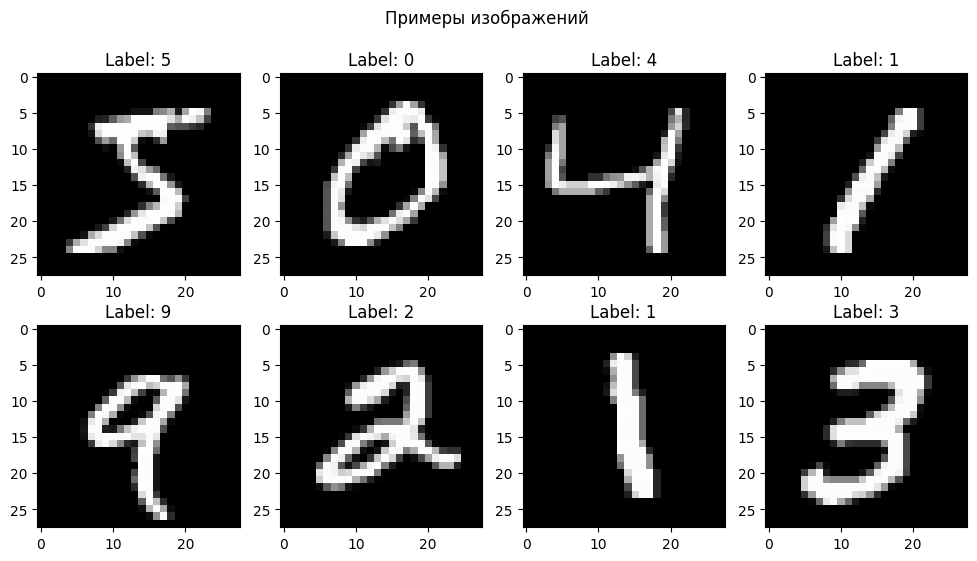

In [19]:
plt.figure(figsize=(12,6))
for i in range(8):
    plt.suptitle('Примеры изображений')
    plt.subplot(2, 4, i + 1)
    plt.imshow(imgs_train[i], cmap='gray')
    plt.title(f'Label: {labels_train[i]}')

plt.show()

Определение функций

In [20]:
# Функция активации на скрытом слое - ReLU
def ReLU(x):
    return np.maximum(x, 0)

def d_ReLU(x):
    return np.where(x > 0.0, 1, 0)

# Функция активации на выходном слое - softmax
def softmax(x):
    x = np.exp(x - np.max(x, axis = x.ndim - 1, keepdims = True))
    sum = np.sum(x, axis=x.ndim - 1, keepdims = True)
    return x / sum


Класс нейронной сети

In [21]:
class neural_network:
    def __init__(self, in_size, hid_size, out_size, lr):
        self.learning_rate = lr

        self.b1 = np.zeros((1, hid_size))
        self.b2 = np.zeros((1, out_size))

        self.w1 = np.sqrt(2.0/in_size) * np.random.randn(in_size, hid_size)
        self.w2 = np.sqrt(2.0/hid_size) * np.random.randn(hid_size, out_size)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = ReLU(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return softmax(self.z2)

    def backward(self, x, y):   
        d2 = (self.forward(x) - y) / x.shape[0]
        d1 = np.dot(d2, self.w2.T) * d_ReLU(self.z1)

        dw2 = np.dot(self.a1.T, d2)
        dw1 = np.dot(x.T, d1)

        db2 = np.sum(d2, axis = 0, keepdims = True)
        db1 = np.sum(d1, axis = 0, keepdims = True)

        self.w1 -= self.learning_rate * dw1
        self.w2 -= self.learning_rate * dw2

        self.b1 -= self.learning_rate * db1
        self.b2 -= self.learning_rate * db2

    def predict(self, x):
        return self.forward(x)

    def shuffle(self, x, y):
        indx_arr = np.random.permutation(x.shape[0])
        return x[indx_arr], y[indx_arr]

    def train(self, x_train, y_train, epochs, batch_size):
        for e in range(epochs):
            start = time.time()
            shuffle_x_train, shuffle_y_train = self.shuffle(x_train, y_train)

            for i in range(0, len(x_train), batch_size):
                x_batch = shuffle_x_train[i:i + batch_size]
                y_batch = shuffle_y_train[i:i + batch_size]
                self.backward(x_batch, y_batch)

            res = self.predict(x_train)

            accuracy = np.mean(np.argmax(res, axis = 1) == np.argmax(y_train, axis = 1))
            value_cross_ent = np.mean(-np.sum(y_train * np.log(res), axis = 1))
            dur = time.time() - start

            print(f"Epoch: {e + 1}/{epochs}, Time: {dur:3f}, Train accuracy: {accuracy:5f}, Loss: {value_cross_ent:5f}")


In [22]:
input_size = 28 * 28  
hidden_size = 300  
output_size = 10  
learning_rate = 0.1
epochs = 20
batch_size = 64

imgs_train = imgs_train.reshape(-1, input_size)
imgs_test = imgs_test.reshape(-1, input_size)

labels_train = np.eye(10)[labels_train]
labels_test = np.eye(10)[labels_test]

nn = neural_network(input_size, hidden_size, output_size, learning_rate)

nn.train(imgs_train, labels_train, epochs, batch_size)


Epoch: 1/20, Time: 1.450307, Train accuracy: 0.939833, Loss: 0.216474
Epoch: 2/20, Time: 1.292732, Train accuracy: 0.958983, Loss: 0.146593
Epoch: 3/20, Time: 1.263116, Train accuracy: 0.966350, Loss: 0.118335
Epoch: 4/20, Time: 1.315376, Train accuracy: 0.973900, Loss: 0.093188
Epoch: 5/20, Time: 1.267362, Train accuracy: 0.977350, Loss: 0.080635
Epoch: 6/20, Time: 1.187637, Train accuracy: 0.981467, Loss: 0.066519
Epoch: 7/20, Time: 1.211480, Train accuracy: 0.984267, Loss: 0.058455
Epoch: 8/20, Time: 1.203308, Train accuracy: 0.986017, Loss: 0.052093
Epoch: 9/20, Time: 1.241242, Train accuracy: 0.988233, Loss: 0.045664
Epoch: 10/20, Time: 1.371158, Train accuracy: 0.988967, Loss: 0.042900
Epoch: 11/20, Time: 1.299485, Train accuracy: 0.991017, Loss: 0.038769
Epoch: 12/20, Time: 1.373591, Train accuracy: 0.992383, Loss: 0.032219
Epoch: 13/20, Time: 1.365657, Train accuracy: 0.993483, Loss: 0.029049
Epoch: 14/20, Time: 1.331714, Train accuracy: 0.994583, Loss: 0.026260
Epoch: 15/20, T

In [23]:
res = nn.predict(imgs_test)
accuracy = np.mean(np.argmax(res, axis = 1) == np.argmax(labels_test, axis = 1))
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9809
